# Perceptron Simples aplicado ao problema da Iris e Conjunto Artificial (Algoritmos Supervisionados, para problemas de Classificação)

## Importando libs, carregando dataset e fazendo pré-processamento dos dados


In [1]:
import torch
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


### Dataset Iris

#### Carregando dataset iris e dividindo entre conjunto de atributos (X) e rótulos (y)

In [2]:
# importando dataset
iris_ds = load_iris()

In [3]:
# Dividindo conjunto de atributos e de rótulos
X, y = iris_ds.data, iris_ds.target

X.shape, y.shape

((150, 4), (150,))

#### Fazendo escalonamento do conjunto de atributos (X), e dividindo o dataset entre conjuntos de treinamento e teste

In [4]:
from sklearn.preprocessing import StandardScaler
X_scalled = StandardScaler().fit_transform(X)

### Conjunto de Dados Artificial I

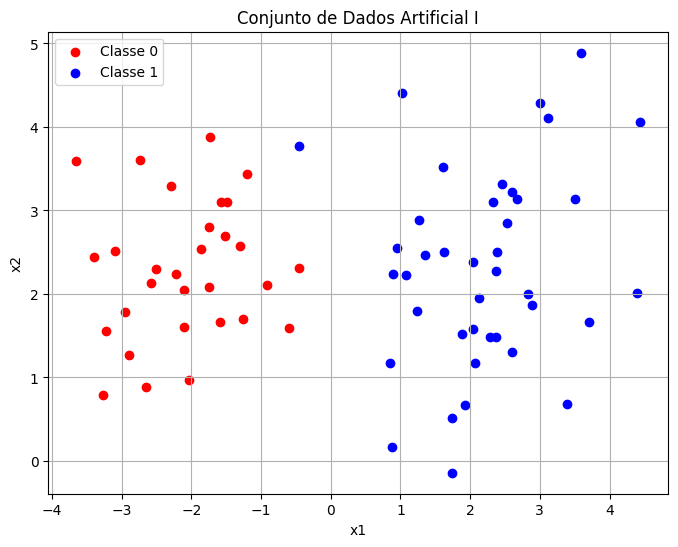

In [2]:
# Gerando os dados do conjunto Artificial
import numpy as np
import matplotlib.pyplot as plt

# Configurações dos dados
n_class_0 = 30
n_class_1 = 40
mean_class_0 = [-2, 2]
mean_class_1 = [2, 2]
std_dev = 1.0

# Gerando os dados da Classe 0
X_class_0 = np.random.normal(loc=mean_class_0, scale=std_dev, size=(n_class_0, 2))
y_class_0 = np.zeros(n_class_0)

# Gerando os dados da Classe 1
X_class_1 = np.random.normal(loc=mean_class_1, scale=std_dev, size=(n_class_1, 2))
y_class_1 = np.ones(n_class_1)

# Unindo os dados em um único conjunto
X_art = np.vstack((X_class_0, X_class_1))
y_art = np.hstack((y_class_0, y_class_1))

# Visualização dos Dados
plt.figure(figsize=(8, 6))
plt.scatter(X_class_0[:, 0], X_class_0[:, 1], color='red', label='Classe 0')
plt.scatter(X_class_1[:, 0], X_class_1[:, 1], color='blue', label='Classe 1')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Conjunto de Dados Artificial I')
plt.legend()
plt.grid(True)
plt.show()

## Definindo as funções para dividir o conjunto de dados e para criar os tensores torch, respectivamente

In [4]:
# Criando uma função para dividir os conjuntos entre treinamento e teste
from sklearn.model_selection import train_test_split

def split_data(X, y, test_size, random_state):
   return train_test_split(X, y, test_size=test_size, random_state=random_state)

#### Criando tensores torch a partir dos conjuntos divididos

In [5]:
def create_tensors(X_train, X_test, y_train, y_test, dtype):
  X_train_tensor = torch.tensor(X_train, dtype=dtype)
  X_test_tensor = torch.tensor(X_test, dtype=dtype)
  # Para saídas binárias é preciso ser nesse formato (n, 1)
  y_train_tensor = torch.tensor(y_train, dtype=dtype).view(-1, 1)
  y_test_tensor = torch.tensor(y_test, dtype=dtype).view(-1, 1)
  return X_train_tensor, X_test_tensor, y_train_tensor, y_test_tensor

## Definindo funções para execução do treinamento

In [6]:
# Função de ativação degrau
# def step_function(x): # Outra forma de fazer a função de ativação degrau, sem torch
#   return (x >= 0).float()
def step_function(x):
    return torch.where(x >= 0, 1, 0)

# Função de ativação sigmoid (apenas para alguns testes, mas não utilizada na impl. final)
def sigmoid(x):
  return 1 / (1 + torch.exp(-x))

In [7]:
# Inicializando pesos e bias
def initialize_weights(input_size):
  # Inicializa pesos aleatórios pequenos
  weights = torch.randn(input_size, 1, dtype=torch.float32) * 0.01
  bias = torch.zeros(1, dtype=torch.float32) # Bias (viés) inicializando com 0

  return weights, bias

In [8]:
# Treinamento do Perceptron Simples
def train_perceptron(X_train_tensor, y_train_tensor, learning_rate, n_epochs):
  input_size = X_train_tensor.shape[1]
  weights, bias = initialize_weights(input_size)

  loss_history = []
  zero_loss_flag = False

  for epoch in range(n_epochs):
    # Calculando a saída do perceptron
    linear_output = torch.matmul(X_train_tensor, weights) + bias
    predictions = step_function(linear_output)

    # Calculando o erro (Erro = y_real - y_predito) e a perda (loss)
    errors = y_train_tensor - predictions
    loss = torch.sum(errors != 0).item()

    if loss != 0 and not zero_loss_flag:
      print(f"Perda (loss) Inicial: {loss}")
      zero_loss_flag = True

    # Armazenando histórico de perda (loss)
    loss_history.append(loss)

    # Atualização dos pesos e bias
    weights += learning_rate * torch.matmul(X_train_tensor.T, errors)
    bias += learning_rate * torch.sum(errors)

    if (epoch + 1) % 10 == 0:
      print(f"Época [{epoch + 1}/{n_epochs}], Perda (loss) final: {loss:.4f}")

  return weights, bias, loss_history

In [9]:
# Previsão usando o Perceptron treinado
def predict(X_test, weights, bias):
  linear_output = torch.matmul(X_test, weights) + bias
  return step_function(linear_output)

## Treinando modelo para classficação da Iris

### Fazendo para as três combinações (de uma classe de Íris contra as outras)

In [ ]:
n_completions = 20
learning_rate = 0.05
n_epochs = 15
classes_names = iris_ds.target_names

# Armazenamento dos resultados
all_predictions = {class_name: [] for class_name in classes_names}
accuracies = {class_name: [] for class_name in classes_names}
all_y_test = {class_name: [] for class_name in classes_names}
all_loss_histories = {class_name: [] for class_name in classes_names}
classes_names = iris_ds.target_names

# Loop para cada classe
for class_name in classes_names:
  # Criação de y (target), com codificação binária, para cada classe (1 para a classe e 0 para as outras)
  # Em cada condicional é verificado no dataset qual o valor de y, sendo 1 (setosa), 2 (versicolor) ou 3 (virginica))
  if class_name == 'setosa':
    y_binary = (y == 0).astype(int) # Setosa vs Não-Setosa
  elif class_name == 'versicolor':
    y_binary = (y == 1).astype(int) # Versicolor vs Não-Versicolor
  elif class_name == 'virginica':
    y_binary = (y == 2).astype(int) # Virginica vs Não-Virginica


  # Executando o algoritmo, aplicando o Hold-out
  for i in range(n_completions):
    # Fazendo divisão aleatória dos dados entre treinamento e teste
    X_train, X_test, y_train, y_test = split_data(
          X_scalled, y_binary, test_size=0.3, random_state=i)

    # Convertendo os dados para tensores torch
    X_train_tensor, X_test_tensor, y_train_tensor, y_test_tensor = create_tensors(
          X_train, X_test, y_train, y_test, dtype=torch.float32)

    # Treinando o modelo
    weights, bias, loss_history = train_perceptron(
        X_train_tensor, y_train_tensor, learning_rate, n_epochs)

    # Pegando as predições e computando a acurácia
    predictions = predict(X_test_tensor, weights, bias)
    accuracy = (predictions == y_test_tensor).sum().item() / y_test_tensor.size(0)

    # Armazenando os resultados
    accuracies[class_name].append(accuracy)
    all_predictions[class_name].append(predictions)
    all_y_test[class_name].append(y_test_tensor)
    all_loss_histories[class_name].append(loss_history)
    print(f"Realização {i + 1} para {class_name}: Acurácia das previsões = {accuracy:.4f} \n")


Perda (loss) Inicial: 100
Época [10/15], Perda (loss) final: 0.0000
Realização 1 para setosa: Acurácia das previsões = 1.0000 

Perda (loss) Inicial: 12
Época [10/15], Perda (loss) final: 0.0000
Realização 2 para setosa: Acurácia das previsões = 0.9778 

Perda (loss) Inicial: 42
Época [10/15], Perda (loss) final: 0.0000
Realização 3 para setosa: Acurácia das previsões = 1.0000 

Perda (loss) Inicial: 2
Época [10/15], Perda (loss) final: 0.0000
Realização 4 para setosa: Acurácia das previsões = 1.0000 

Perda (loss) Inicial: 8
Época [10/15], Perda (loss) final: 0.0000
Realização 5 para setosa: Acurácia das previsões = 1.0000 

Perda (loss) Inicial: 2
Época [10/15], Perda (loss) final: 0.0000
Realização 6 para setosa: Acurácia das previsões = 1.0000 

Perda (loss) Inicial: 38
Época [10/15], Perda (loss) final: 0.0000
Realização 7 para setosa: Acurácia das previsões = 1.0000 

Perda (loss) Inicial: 103
Época [10/15], Perda (loss) final: 0.0000
Realização 8 para setosa: Acurácia das previs

#### Mostrando os resultados e gráficos




Para setosa: Acurácia média = 0.9944, Variância = 0.0002, Desvio padrão = 0.0138
Perda ao longo das épocas: [100, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Média de acurácia: 0.9944
Desvio padrão de acurácia: 0.0138
Melhor realização: 1
Acurácia da melhor realização: 1.0000


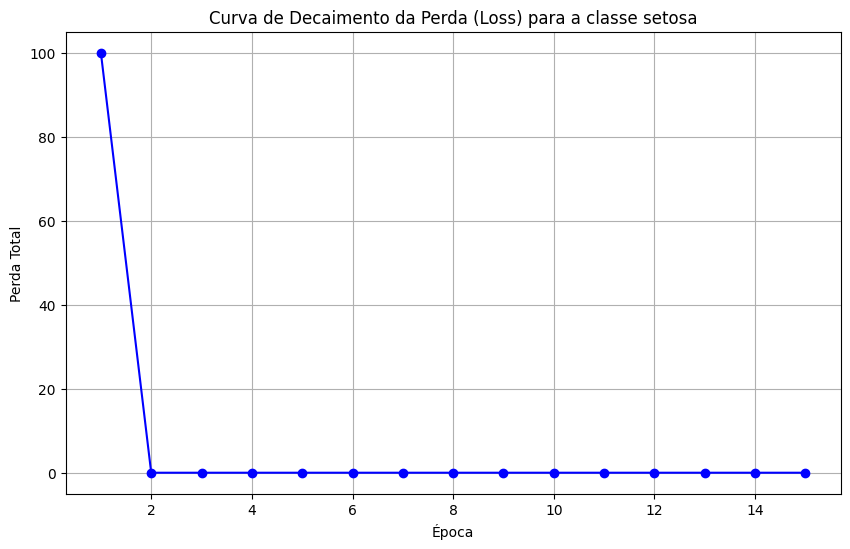

<Figure size 800x600 with 0 Axes>

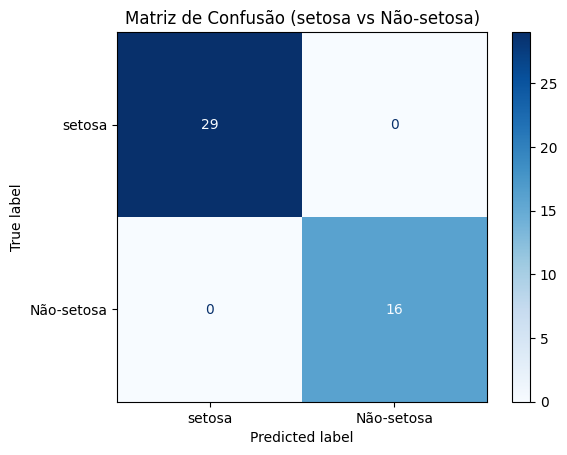



Para versicolor: Acurácia média = 0.6089, Variância = 0.0182, Desvio padrão = 0.1349
Perda ao longo das épocas: [36, 52, 47, 42, 44, 44, 48, 45, 40, 40, 39, 43, 57, 47, 31]
Média de acurácia: 0.6089
Desvio padrão de acurácia: 0.1349
Melhor realização: 10
Acurácia da melhor realização: 0.8889


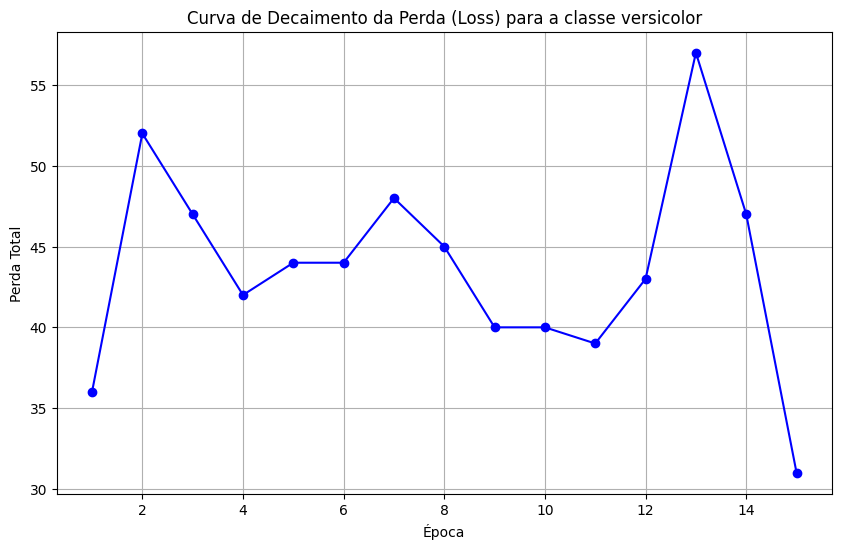

<Figure size 800x600 with 0 Axes>

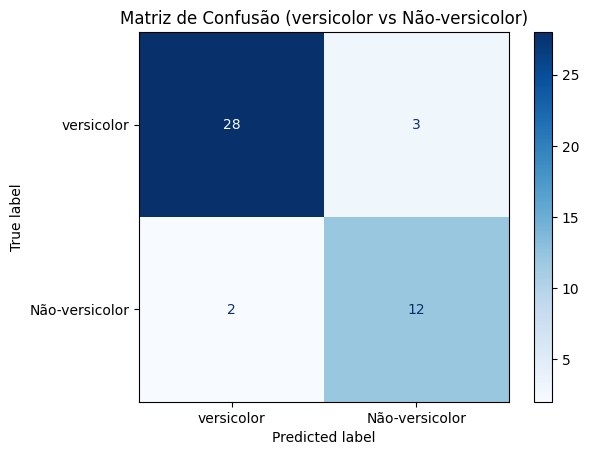



Para virginica: Acurácia média = 0.9556, Variância = 0.0012, Desvio padrão = 0.0344
Perda ao longo das épocas: [77, 32, 23, 19, 10, 6, 5, 5, 6, 5, 3, 4, 4, 5, 3]
Média de acurácia: 0.9556
Desvio padrão de acurácia: 0.0344
Melhor realização: 10
Acurácia da melhor realização: 1.0000


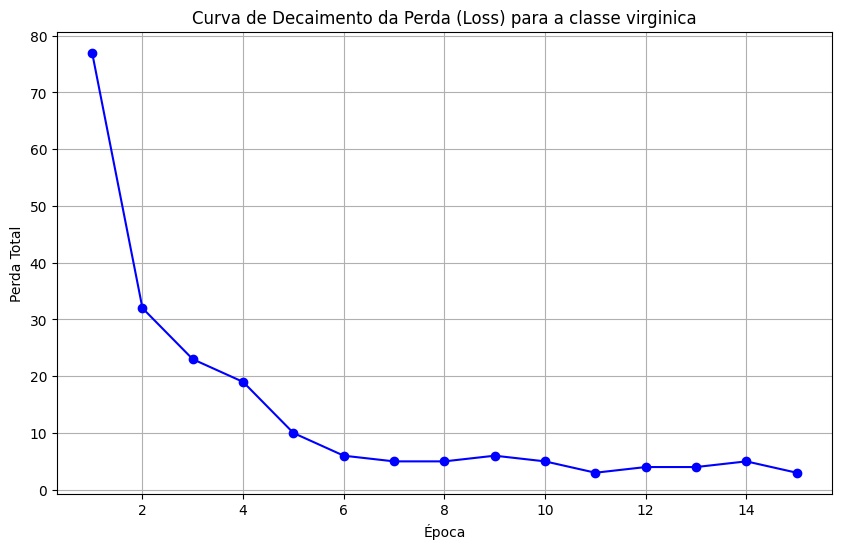

<Figure size 800x600 with 0 Axes>

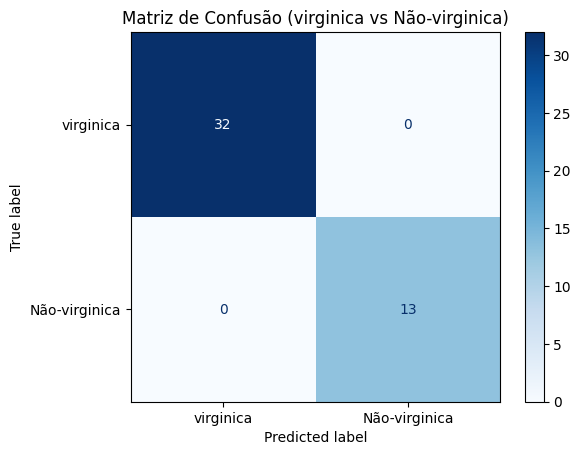

In [ ]:
# Para cada classe, computar méstricas como média e desvio padrão da acurácia, como também plotando gráficos
for class_name in classes_names:
    accuracies_mean = sum(accuracies[class_name]) / len(accuracies[class_name])
    variance = sum((val - accuracies_mean) ** 2 for val in accuracies[class_name]) / len(accuracies[class_name])
    std_dev_accuracies = variance ** 0.5
    print("\n")
    print(f"Para {class_name}: Acurácia média = {accuracies_mean:.4f}, Variância = {variance:.4f}, Desvio padrão = {std_dev_accuracies:.4f}")

    # Encontrando a melhor realização (a que teve maior acurácia)
    best_accuracy = max(accuracies[class_name])
    best_accuracy_index = accuracies[class_name].index(best_accuracy)
    best_loss_history = all_loss_histories[class_name][best_accuracy_index]
    best_y_test = all_y_test[class_name][best_accuracy_index]
    best_predictions = all_predictions[class_name][best_accuracy_index]

    # Exemplo de como visualizar o histórico de perda da melhor realização para a classe
    print(f"Perda ao longo das épocas: {best_loss_history}")
    print(f"Média de acurácia: {accuracies_mean:.4f}")
    print(f"Desvio padrão de acurácia: {std_dev_accuracies:.4f}")
    print(f"Melhor realização: {best_accuracy_index + 1}")
    print(f"Acurácia da melhor realização: {best_accuracy:.4f}")


    # Plot da curva de perda -------------------------------------------------------------------------
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, n_epochs + 1), best_loss_history, marker='o', linestyle='-', color='b')
    plt.title(f"Curva de Decaimento da Perda (Loss) para a classe {class_name}")
    plt.xlabel("Época")
    plt.ylabel("Perda Total")
    plt.grid(True)
    plt.show()


    # Matriz de confusão -------------------------------------------------------------------------------
    cm = confusion_matrix(best_y_test, best_predictions.numpy())
    plt.figure(figsize=(8, 6))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[f'{class_name}', f'Não-{class_name}'])
    disp.plot(cmap=plt.cm.Blues, values_format='d')
    plt.title(f'Matriz de Confusão ({class_name} vs Não-{class_name})')
    plt.show()


## Treinando o Conjunto Artificial I

#### Executando o algoritmo

In [10]:
''' Executando o algoritmo, aplicando o Hold-out '''

# Parâmetros do algoritmo
n_completions = 20
learning_rate = 0.02
n_epochs = 15

# Lista para armazenar pesos, bias e perdas de cada realização
accuracies = []
results = []
all_loss_histories = []
all_predictions = []
all_X_train = []
all_X_test = []
all_y_train = []
all_y_test = []
all_weights = []
all_bias = []

# Executando o algoritmo, aplicando o Hold-out
for i in range(n_completions):
    # Fazendo divisão aleatória dos dados entre treinamento e teste
    X_train_art, X_test_art, y_train_art, y_test_art = split_data(
        X_art, y_art, test_size=0.3, random_state=i)

    # Convertendo os dados para tensores torch
    X_train_art_tensor, X_test_art_tensor, y_train_art_tensor, y_test_art_tensor = create_tensors(
        X_train_art, X_test_art, y_train_art, y_test_art, dtype=torch.float32)

    # Treinando o modelo
    weights, bias, loss_history = train_perceptron(
        X_train_art_tensor, y_train_art_tensor, learning_rate, n_epochs)

    # Pegando as predições e computando a acurácia
    predictions = predict(X_test_art_tensor, weights, bias)
    accuracy = (predictions == y_test_art_tensor).sum().item() / y_test_art_tensor.size(0)

    # Armazenando resultados
    accuracies.append(accuracy)
    all_loss_histories.append(loss_history)
    all_predictions.append(predictions)
    all_X_train.append(X_train_art_tensor)
    all_y_train.append(y_train_art_tensor)
    all_X_test.append(X_test_art_tensor)
    all_y_test.append(y_test_art_tensor)
    all_weights.append(weights)
    all_bias.append(bias)

    print(f"Realização {i+1}: Acurácia no conjunto de teste = {accuracy:.4f} \n")

Perda (loss) Inicial: 25
Época [10/15], Perda (loss) final: 0.0000
Realização 1: Acurácia no conjunto de teste = 0.9524 

Perda (loss) Inicial: 15
Época [10/15], Perda (loss) final: 0.0000
Realização 2: Acurácia no conjunto de teste = 1.0000 

Perda (loss) Inicial: 1
Época [10/15], Perda (loss) final: 0.0000
Realização 3: Acurácia no conjunto de teste = 0.9524 

Perda (loss) Inicial: 24
Época [10/15], Perda (loss) final: 0.0000
Realização 4: Acurácia no conjunto de teste = 1.0000 

Perda (loss) Inicial: 6
Época [10/15], Perda (loss) final: 0.0000
Realização 5: Acurácia no conjunto de teste = 0.9524 

Perda (loss) Inicial: 9
Época [10/15], Perda (loss) final: 0.0000
Realização 6: Acurácia no conjunto de teste = 1.0000 

Época [10/15], Perda (loss) final: 0.0000
Realização 7: Acurácia no conjunto de teste = 0.9048 

Perda (loss) Inicial: 48
Época [10/15], Perda (loss) final: 0.0000
Realização 8: Acurácia no conjunto de teste = 1.0000 

Perda (loss) Inicial: 48
Época [10/15], Perda (loss)

#### Computando os resultados

##### Fazendo cálculo direto

In [11]:
accuracies_mean = sum(accuracies) / len(accuracies)
variance = sum((val - accuracies_mean) ** 2 for val in accuracies) / len(accuracies)
std_dev_accuracies = variance ** 0.5
print(f"\nAcurácia média: {accuracies_mean:.4f}, | Desvio padrão da acurácia: {std_dev_accuracies:.4f}")

# Selecionando a Realização com a Acurácia com valor mais próxima da média (nesse caso ACIMA)
# Encontrando o índice da realização mais próxima da média (usando abordagem Tensorial)
accuracies_tensor = torch.tensor(accuracies)
valid_indices = torch.where(accuracies_tensor >= accuracies_mean)[0]
valid_differences = torch.abs(accuracies_tensor[valid_indices] - accuracies_mean)
closest_valid_index = valid_indices[torch.argmin(valid_differences)].item()

# Recuperando os resultados correspondentes
closest_accuracy = accuracies[closest_valid_index]
closest_loss_history = all_loss_histories[closest_valid_index]
closest_predictions = all_predictions[closest_valid_index]
closest_weights = all_weights[closest_valid_index]
closest_bias = all_bias[closest_valid_index]

closest_X_train = all_X_train[closest_valid_index]
closest_y_train = all_y_train[closest_valid_index]
closest_X_test = all_X_test[closest_valid_index]
closest_y_test = all_y_test[closest_valid_index]

# Exibindo informações
print(f"Realização mais próxima da acurácia média: {closest_valid_index + 1} | "
 f"Acurácia dessa realização: {closest_accuracy:.4f}")


Acurácia média: 0.9810, | Desvio padrão da acurácia: 0.0278
Realização mais próxima da acurácia média: 2 | Acurácia dessa realização: 1.0000


### Gráficos

#### Gráfico com o espaço dos dados de entrada e a superfície de decisão (para Train e Test)

<ipython-input-12-01ba75185429>:24: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X[idx, 0], X[idx, 1], c=color, label=f"Classe {label}",


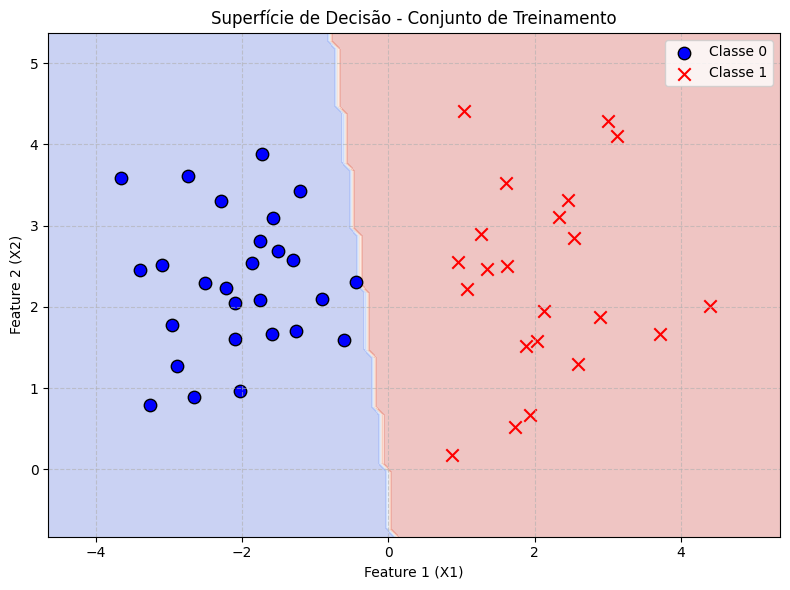

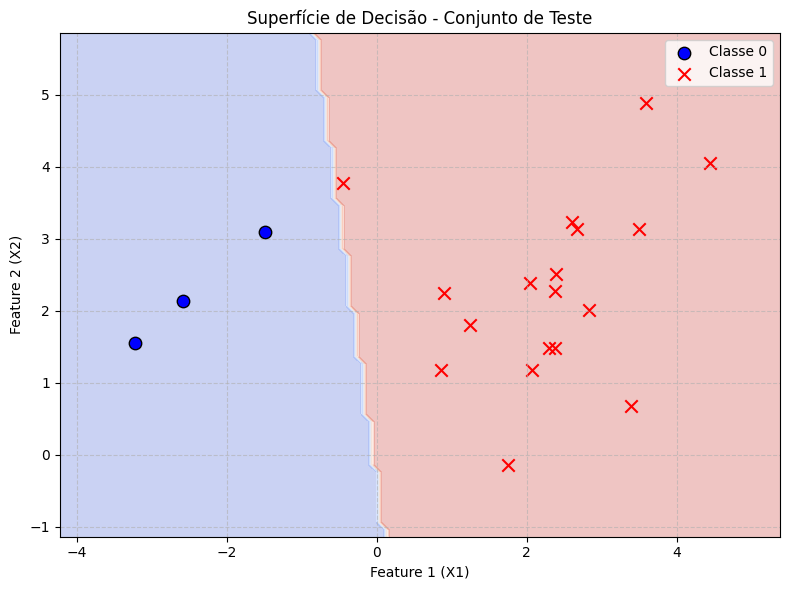

In [12]:
# Função para plotar a superfície de decisão
def plot_decision_boundary(X, y, weights, bias, title):
    # Definindo limites do gráfico
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))

    # Gerando pontos do grid e calculando a saída do modelo
    grid_points = np.c_[xx.ravel(), yy.ravel()]
    grid_tensor = torch.FloatTensor(grid_points)
    Z = step_function(torch.matmul(grid_tensor, weights) + bias).detach().numpy()
    Z = Z.reshape(xx.shape)

    # Plotando a superfície de decisão
    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')

    # Plotando os dados do conjunto
    y = y.squeeze()
    for label, color, marker in zip([0, 1], ['blue', 'red'], ['o', 'x']):
        # idx = y == label
        idx = (y == label).numpy()
        plt.scatter(X[idx, 0], X[idx, 1], c=color, label=f"Classe {label}",
                    marker=marker, edgecolor='k', s=80)

    # Configurações do gráfico
    plt.title(title)
    plt.xlabel("Feature 1 (X1)")
    plt.ylabel("Feature 2 (X2)")
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()

# Chamando a função para conjuntos de treinamento e teste separadamente
plot_decision_boundary(closest_X_train, closest_y_train, closest_weights, closest_bias,
                       "Superfície de Decisão - Conjunto de Treinamento")
plot_decision_boundary(closest_X_test, closest_y_test, closest_weights, closest_bias,
                       "Superfície de Decisão - Conjunto de Teste")


#### Matriz de Confusão

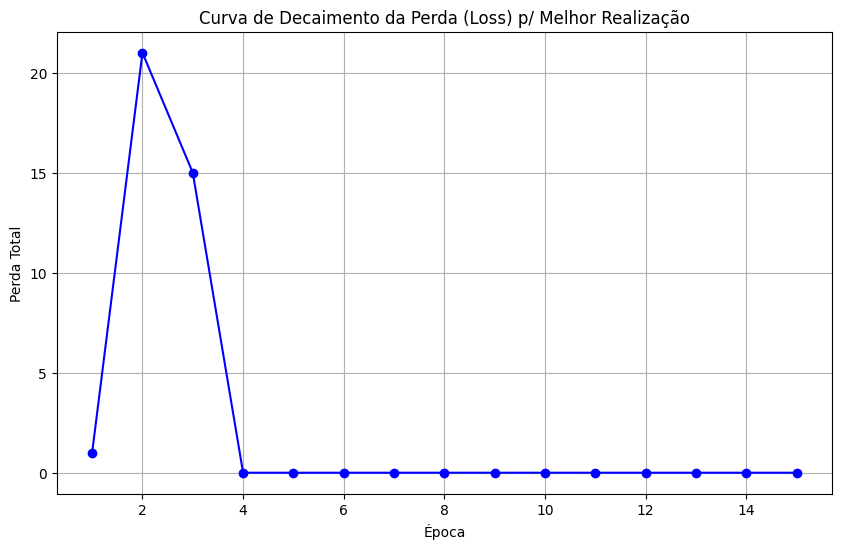

<Figure size 800x600 with 0 Axes>

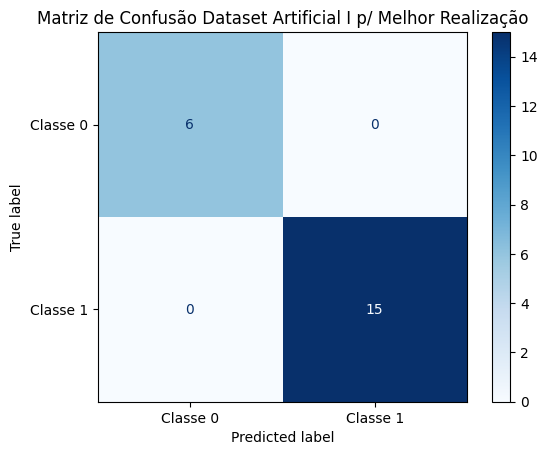

In [ ]:
    # Plot da curva de perda -------------------------------------------------------------------------
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, n_epochs + 1), closest_loss_history, marker='o', linestyle='-', color='b')
    plt.title(f"Curva de Decaimento da Perda (Loss) p/ Melhor Realização")
    plt.xlabel("Época")
    plt.ylabel("Perda Total")
    plt.grid(True)
    plt.show()


    # Matriz de confusão -------------------------------------------------------------------------------
    cm = confusion_matrix(closest_y_test, closest_predictions.numpy())
    plt.figure(figsize=(8, 6))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Classe 0', 'Classe 1'])
    disp.plot(cmap=plt.cm.Blues, values_format='d')
    plt.title(f'Matriz de Confusão Dataset Artificial I p/ Melhor Realização')
    plt.show()